# Пример рекуррентной классификационной нейронной сети на основе TensorFlow

## Импортируем всё необходимое

In [97]:
# Джентльменский набор (за исключением pandas, здесь он нам не пригодится)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Импортируем простую модель многослойного персептрона Sequential и тип слоя нейронной сети Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

## Подготавливаем данные

In [98]:
# Загрузка в список тренировочного набора данных CSV-файла набора MNIST 
training_data_file = open('mnist_dataset/mnist_train.csv', 'r')
training_data_list = training_data_file.readlines() 
training_data_file.close()

x_train = []
y_train = []
# Производим нормировку входных и выходных значений
for record in training_data_list:
    all_values = record.split(',')
    x_train.append((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

    target = np.zeros(10) + 0.01
    target[int(all_values[0])] = 0.99
    y_train.append(target)
    
x_train = np.array(x_train)
y_train = np.array(y_train)

In [99]:
# Загрузка в список тестового набора данных CSV-файла набора MNIST 
test_data_file = open('mnist_dataset/mnist_test.csv', 'r')
test_data_list = test_data_file.readlines() 
test_data_file.close()

x_test = []
y_test = []
# Производим нормировку входных и выходных значений
for record in test_data_list:
    all_values = record.split(',')
    x_test.append((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

    target = np.zeros(10) + 0.01
    target[int(all_values[0])] = 0.99
    y_test.append(target)
    
x_test = np.array(x_train)
y_test = np.array(y_train)

## Создаём модель

In [106]:
model = Sequential() # Делаем переменную model объектом класса Sequential (объект класса нейронных сетей)

# Добавляем к нашей модели слои с заданными размерами, функциями активаций
model.add(Dense(200, activation='sigmoid', input_shape=(x_train.shape[1],)))
model.add(Dense(y_train.shape[1], activation='sigmoid')) # sigmoid, т.к. данные мы отнормировали выходные данные от 0 до 1

print(model.summary()) # Выводим архитектуру нашей модели

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 200)               157000    
                                                                 
 dense_19 (Dense)            (None, 10)                2010      
                                                                 
Total params: 159010 (621.13 KB)
Trainable params: 159010 (621.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [107]:
model.compile(optimizer=Adam(learning_rate = 0.01), 
              loss='mse',
              metrics=['accuracy'])

## Тренируем модель

In [108]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0156 - accuracy: 0.8919
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0070 - accuracy: 0.9596
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0059 - accuracy: 0.9672
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0054 - accuracy: 0.9710
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0050 - accuracy: 0.9736


## Тестируем модель

In [109]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

1875/1875 [==============================] - 2s 944us/step - loss: 0.0041 - accuracy: 0.9792
Test accuracy: 0.9792166948318481


In [110]:
predictions = model.predict(x_test)

1875/1875 [==============================] - 2s 942us/step


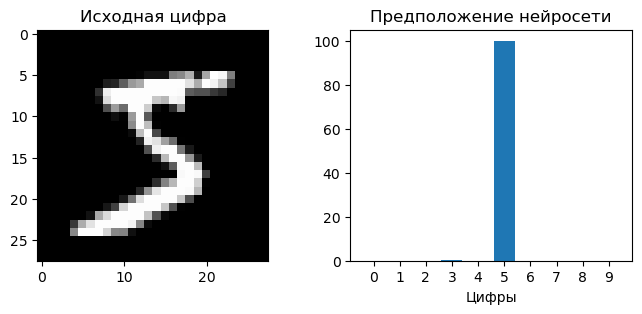

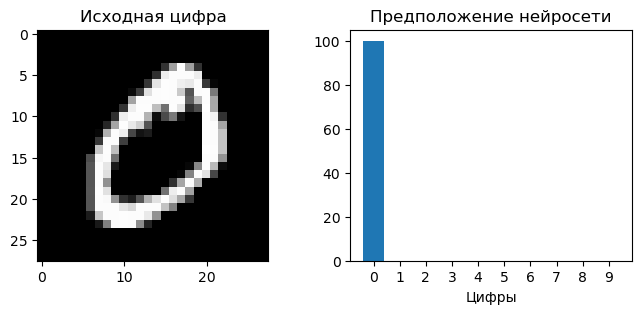

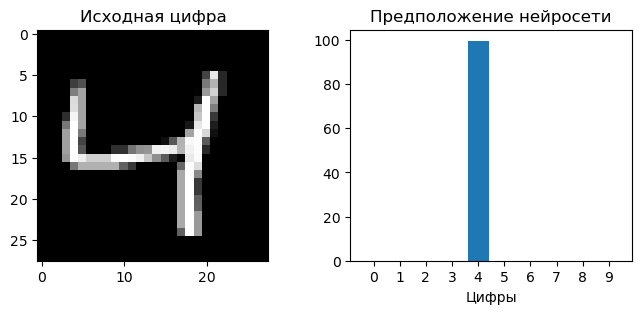

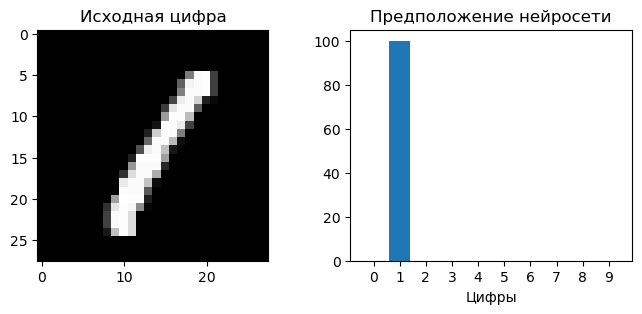

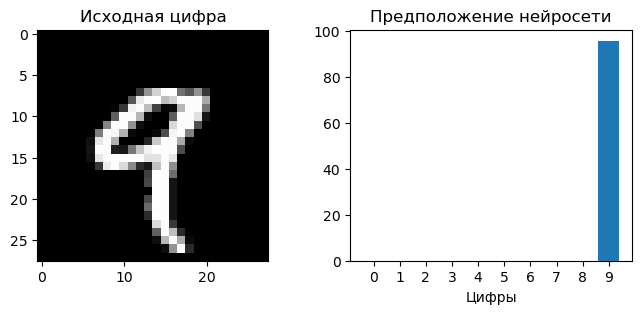

In [113]:
for i in range(5):
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (8,3))

    ax1.imshow(np.asfarray(x_test[i]).reshape((28,28)), cmap = 'gray')
    ax1.set_title('Исходная цифра')

    ax2.bar(range(10), predictions[i] * 100)
    ax2.set_xticks(range(10))
    ax2.set_xlabel('Цифры')
    ax2.set_title('Предположение нейросети');